In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
index = ['vocab_gen', 'src_copy', 'tgt_copy']
freq = [43.83847859457616, 47.58229575302746, 8.579225652396385]
prec = [64.43676291175274, 67.43176696436024, 60.79510703363914]
reca = [61.64769964011283, 72.39896048032978, 49.40357852882703]

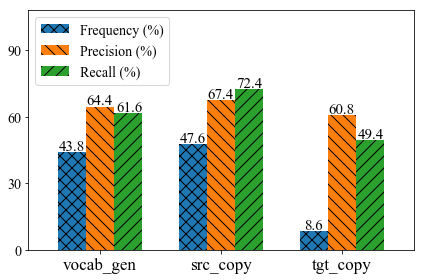

In [3]:
matplotlib.rcParams['font.family'] = 'Times New Roman'
matplotlib.rcParams['font.weight'] = 'light'
del matplotlib.font_manager.weight_dict['roman']
matplotlib.font_manager._rebuild()

df = pd.DataFrame({
    'Frequency (%)': freq, 'Precision (%)': prec, 'Recall (%)': reca
}, index=index)
ax = df.plot(kind='bar', width=0.69, rot=0)

bars = ax.patches
hatches = ''.join(h * len(df) for h in 'x\\/-+O.')
for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch*2)

ax.set_ylim(0, 108)
ax.set_alpha(0.8)
ax.set_yticks([0, 30, 60, 90])
plt.xticks(fontsize=17)
plt.yticks(fontsize=14)
plt.legend(loc=2, fontsize=14)

data = freq + prec + reca

# set individual bar lables using above list
for index, i in enumerate(ax.patches):
    x_pos = i.get_x()
    if index == 2:
        x_pos += 0.03
    if index >= 6:
        x_pos += 0.015
    # get_x pulls left or right; get_height pushes up or down
    ax.text(x_pos, i.get_height()+.9, '{0:.1f}'.format(data[index]), fontsize=15)
    
plt.tight_layout()
plt.savefig('freq_vs_f1.pdf')